# [실습 Quiz 04-19] Keras를 이용한 손글씨 분류하기

## MNIST 훈련데이터 준비하기

In [21]:
import numpy as np

In [22]:
import tensorflow as tf

In [23]:
# None 을 적정한 코드로 교체하세요
mnist = tf.keras.datasets.mnist   
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [24]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [25]:
import matplotlib
import matplotlib.pyplot as plt

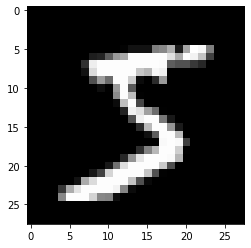

In [26]:
## <샘플이미지 확인하기> 
## 넘파이 배열의 원소값이 0에 가까울수록 이미지가 검게 그려짐. 
## x_train_all[i] 의 i값을 다양하게 입력해 보세요. 0<=i<=59,999
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [27]:
# None 을 적정한 코드로 교체하세요
## <Target 값 확인하기>
## y_target_all : 60,000개의 요소를 가진 1차원 배열. 각 요소는 0~9까지의 정수로 이루어져 있음. 
## 일단 가장 앞에 있는 10개만 출력함.
print(train_labels[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [28]:
## 훈련세트의 목표값들이 고르게 분포되어 있는 지 확인함
## bincount() : 배열에 있는 정수값의 등장횟수를 카운트함.
np.bincount(train_labels)

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

In [29]:
# None 을 적정한 코드로 교체하세요
## 이미지 데이터는 픽셀마다 0~255 사이의 값을 가짐.
## [데이터표준화] 255로 나누어 0~1 사이로 맞추는 것이 유리함.
train_images = train_images / 255.0
test_images = test_images / 255.0

## 케라스를 소개합니다.

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [31]:
# None 을 적정한 코드로 교체하세요
model = Sequential()
# 2차원배열 (28*28픽셀)의 이미지 포맷을 28*28=784 픽셀의 1차원배열로 변환함
model.add(Flatten(input_shape=(28,28)))
## 은닉층을 정의함. 유닛개수 100개
model.add(Dense(100, activation='relu'))
## 출력층을 정의함. 유닛수는 10개
model.add(Dense(10, activation='softmax'))

In [32]:
## 최적화알고리즘은 adam, 손실함수는 크로스엔트로피, metrics : 훈련과정기록으로 정확도를 남기기 위함.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
# None 을 적정한 코드로 교체하세요
## 훈련세트에서 측정한 값들을 History 클래스 객체에 담아서 반환함.
history = model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4426 - accuracy: 0.8738
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1324 - accuracy: 0.9617
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0884 - accuracy: 0.9738
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0632 - accuracy: 0.9808
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0510 - accuracy: 0.9847
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0414 - accuracy: 0.9881
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0310 - accuracy: 0.9908
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0235 - accuracy: 0.9928
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0189 - accuracy: 0.9945
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.015

In [34]:
## history 딕셔너리의 측정지표들
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


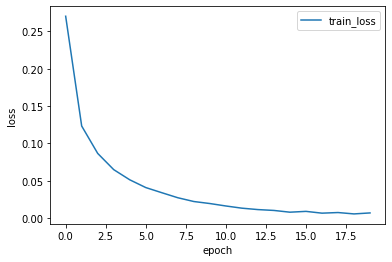

In [35]:
## 손실 추이
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'])
plt.show()

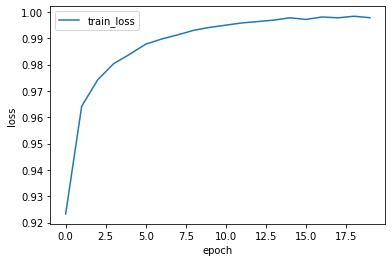

In [36]:
## 정확도 추이
plt.plot(history.history['accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'])
plt.show()

In [37]:
## Verbosity mode.0 = silent, 1 = progress bar
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)

In [38]:
print(f'테스트 손실도 : {test_loss}')

테스트 손실도 : 0.1055542454123497


In [39]:
# None 을 적정한 코드로 교체하세요
print(f'테스트 정확도 : {test_accuracy}')

테스트 정확도 : 0.9767000079154968


In [40]:
# None 을 적정한 코드로 교체하세요
# Step04. 테스트용 데이터를 대입했을 때, 맞추지 못한 항목에 대해 상세 보고한다.
# (1) 맞추지 못한 갯수
# (2) 맞추지 못한 항목 : 인덱스, 예측한 숫자값, 실제 숫자값

def report_model_miss(model, X, Y):
    
    hit = 0
    miss = 0
    nCnt = 0
    misses = []

    predictions = model.predict(X)

    for i in range(len(Y)):
      prediction = np.argmax(predictions[i])
      if prediction == Y[i]:
        hit += 1
      else:
        miss += 1
        miss_item = [i, prediction, Y[i]]
        misses.append(miss_item)
    
    score = hit/len(X)*100        
    print(f'Score is {score}')
       
    print(f'The number of miss: {miss}')
    for i in range(len(misses)):
      print(f'[{misses[i][0]+1}] (예측값){misses[i][1]} (실제값){misses[i][2]}')

      digit_image = X[misses[i][0]].reshape(28, 28)
      plt.imshow(digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
      plt.axis("off")
      plt.show()   


Score is 97.67
The number of miss: 233
[116] (예측값)9 (실제값)4


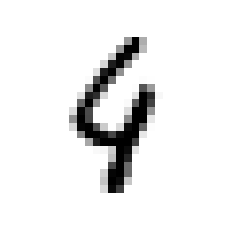

[152] (예측값)8 (실제값)9


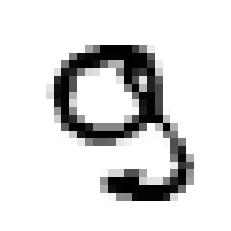

[248] (예측값)6 (실제값)4


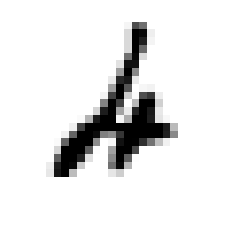

[275] (예측값)3 (실제값)9


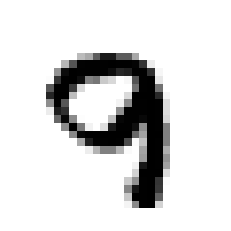

[322] (예측값)7 (실제값)2


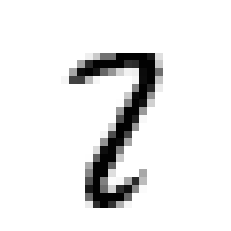

[341] (예측값)3 (실제값)5


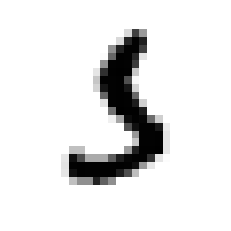

[446] (예측값)0 (실제값)6


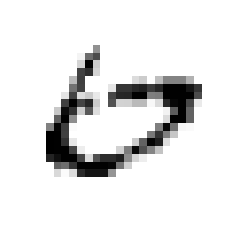

[448] (예측값)9 (실제값)4


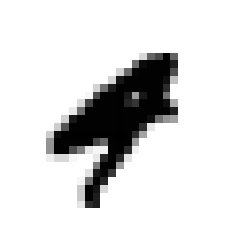

[496] (예측값)2 (실제값)8


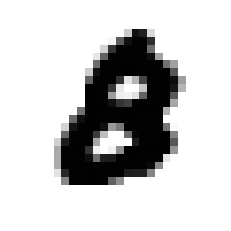

[583] (예측값)2 (실제값)8


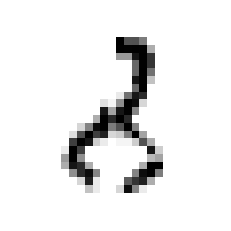

[647] (예측값)6 (실제값)2


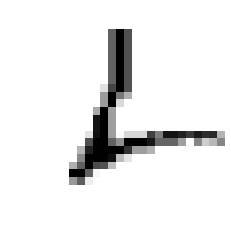

[685] (예측값)2 (실제값)7


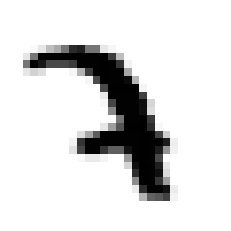

[692] (예측값)4 (실제값)8


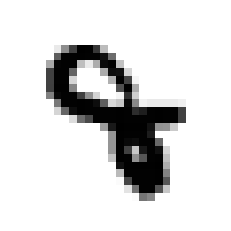

[721] (예측값)8 (실제값)5


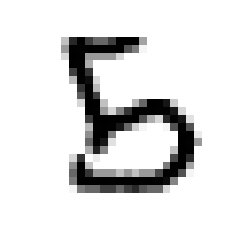

[761] (예측값)9 (실제값)4


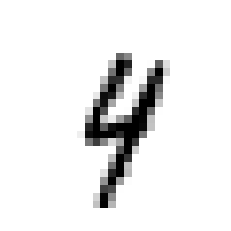

[847] (예측값)9 (실제값)7


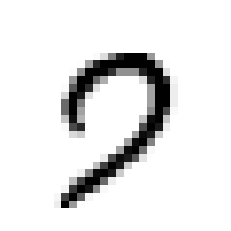

[948] (예측값)9 (실제값)8


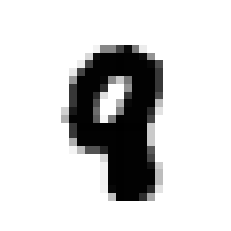

[952] (예측값)4 (실제값)5


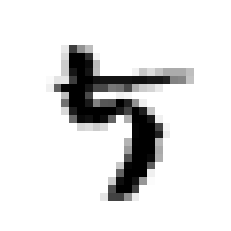

[991] (예측값)1 (실제값)2


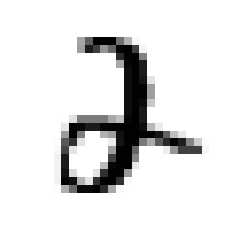

[1000] (예측값)7 (실제값)9


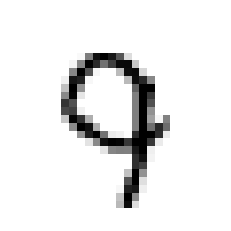

[1015] (예측값)5 (실제값)6


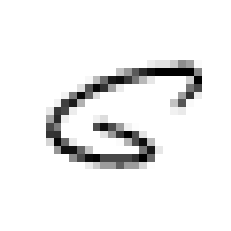

[1040] (예측값)8 (실제값)7


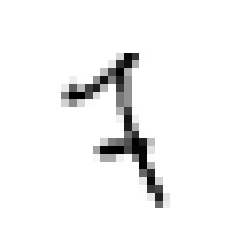

[1045] (예측값)8 (실제값)6


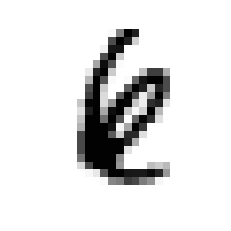

[1063] (예측값)7 (실제값)3


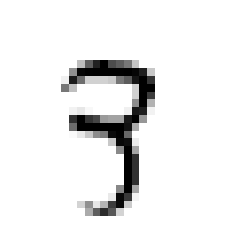

[1113] (예측값)6 (실제값)4


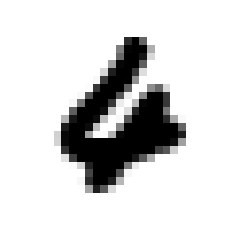

[1129] (예측값)2 (실제값)3


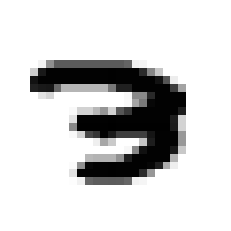

[1157] (예측값)8 (실제값)7


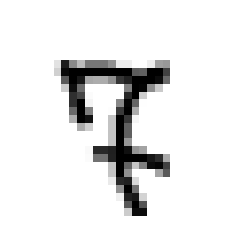

[1179] (예측값)0 (실제값)4


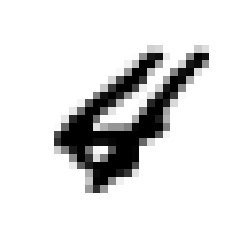

[1183] (예측값)8 (실제값)6


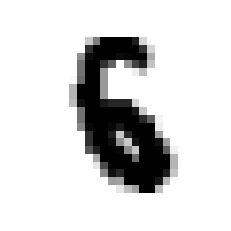

[1193] (예측값)4 (실제값)9


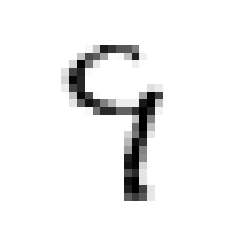

[1225] (예측값)4 (실제값)2


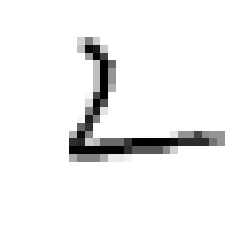

[1227] (예측값)2 (실제값)7


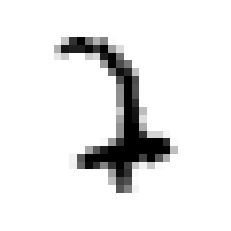

[1233] (예측값)4 (실제값)9


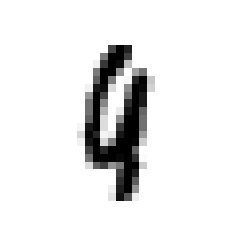

[1243] (예측값)9 (실제값)4


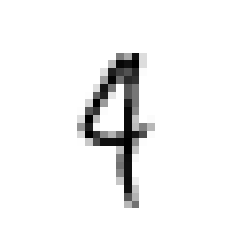

[1248] (예측값)3 (실제값)9


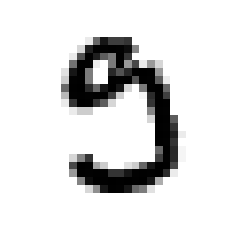

[1273] (예측값)9 (실제값)5


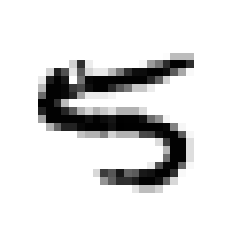

[1300] (예측값)7 (실제값)5


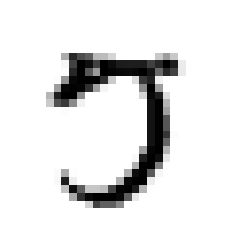

[1320] (예측값)3 (실제값)8


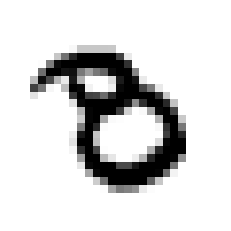

[1329] (예측값)0 (실제값)7


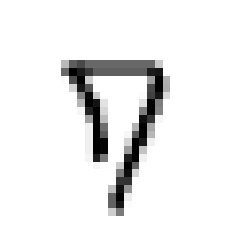

[1394] (예측값)3 (실제값)5


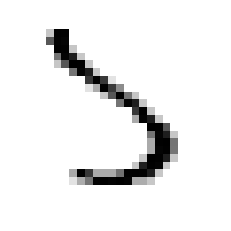

[1396] (예측값)3 (실제값)2


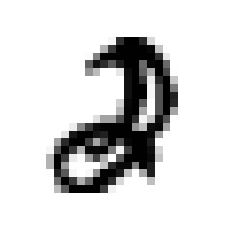

[1445] (예측값)4 (실제값)6


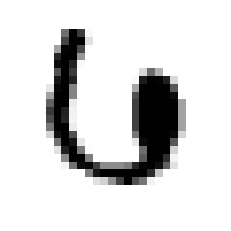

[1465] (예측값)3 (실제값)8


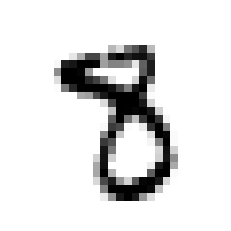

[1523] (예측값)9 (실제값)7


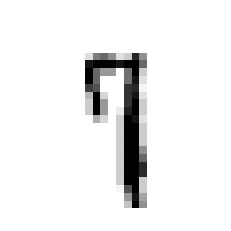

[1531] (예측값)7 (실제값)8


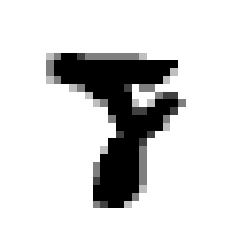

[1550] (예측값)6 (실제값)4


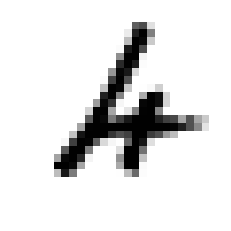

[1554] (예측값)3 (실제값)9


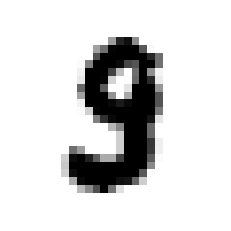

[1610] (예측값)6 (실제값)2


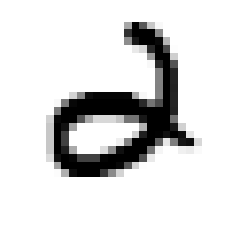

[1671] (예측값)9 (실제값)5


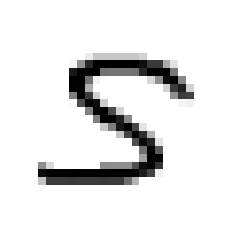

[1682] (예측값)7 (실제값)3


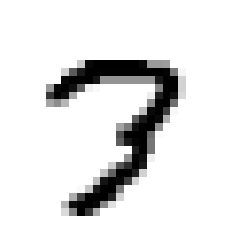

[1710] (예측값)3 (실제값)9


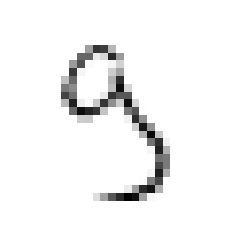

[1749] (예측값)7 (실제값)0


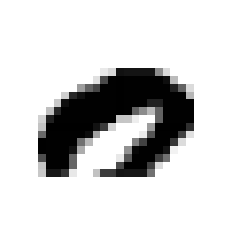

[1752] (예측값)2 (실제값)4


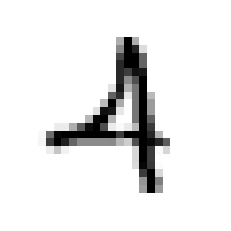

[1755] (예측값)2 (실제값)7


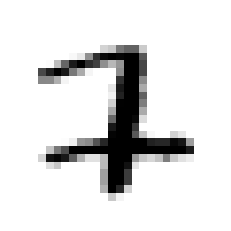

[1791] (예측값)8 (실제값)2


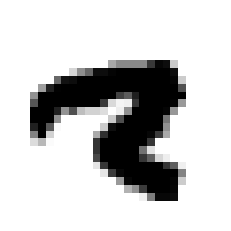

[1801] (예측값)4 (실제값)6


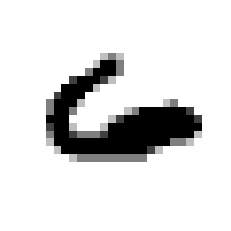

[1851] (예측값)7 (실제값)8


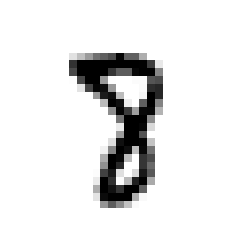

[1879] (예측값)6 (실제값)8


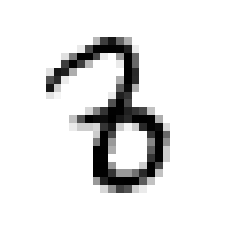

[1881] (예측값)0 (실제값)6


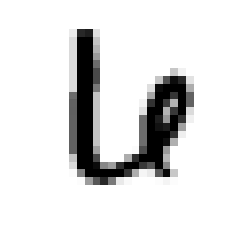

[1902] (예측값)4 (실제값)9


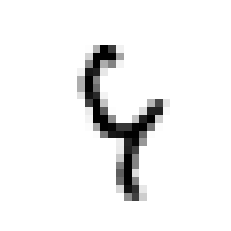

[1953] (예측값)3 (실제값)9


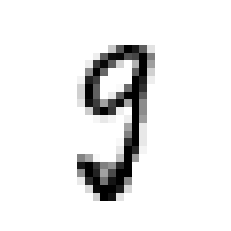

[1988] (예측값)9 (실제값)0


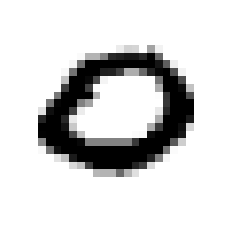

[2017] (예측값)2 (실제값)7


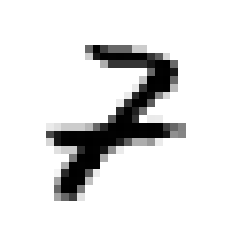

[2025] (예측값)9 (실제값)7


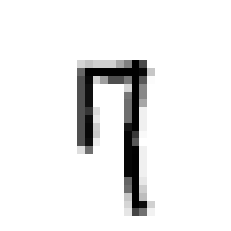

[2036] (예측값)3 (실제값)5


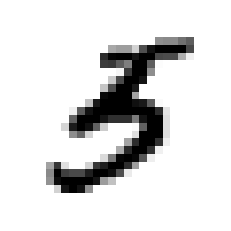

[2041] (예측값)4 (실제값)5


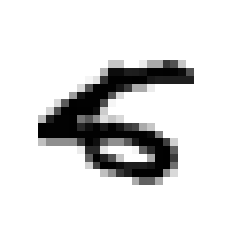

[2044] (예측값)8 (실제값)4


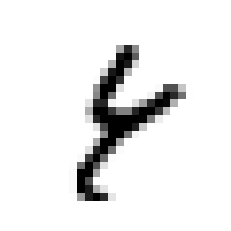

[2045] (예측값)7 (실제값)2


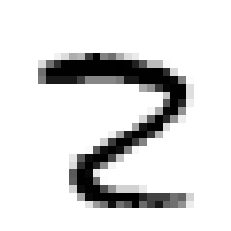

[2054] (예측값)9 (실제값)4


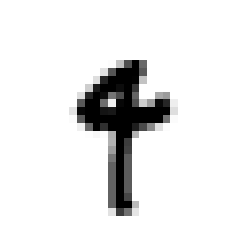

[2071] (예측값)9 (실제값)7


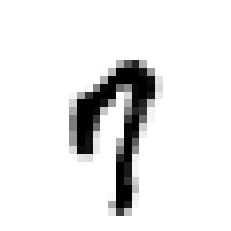

[2099] (예측값)0 (실제값)2


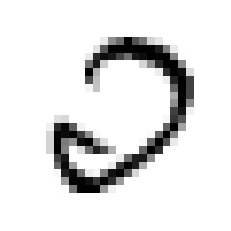

[2110] (예측값)2 (실제값)3


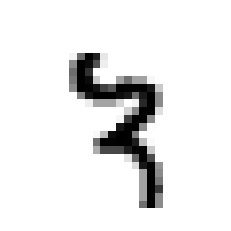

[2119] (예측값)1 (실제값)6


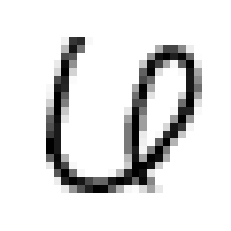

[2131] (예측값)9 (실제값)4


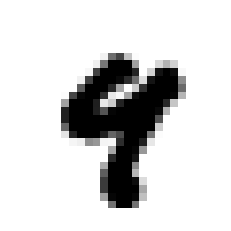

[2183] (예측값)2 (실제값)1


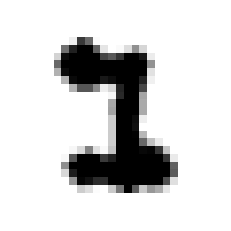

[2186] (예측값)8 (실제값)0


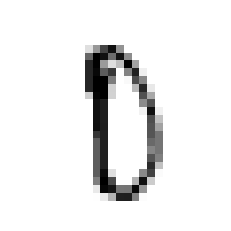

[2225] (예측값)6 (실제값)5


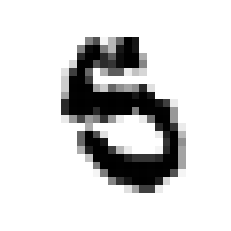

[2273] (예측값)0 (실제값)8


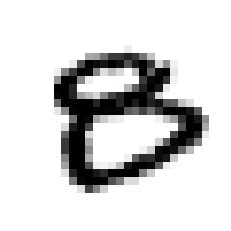

[2294] (예측값)0 (실제값)9


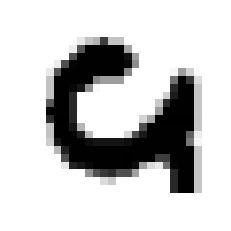

[2339] (예측값)9 (실제값)4


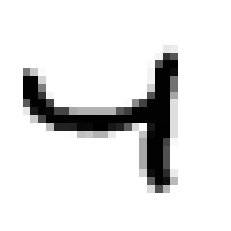

[2370] (예측값)9 (실제값)5


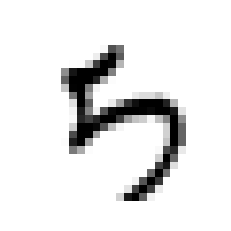

[2388] (예측값)1 (실제값)9


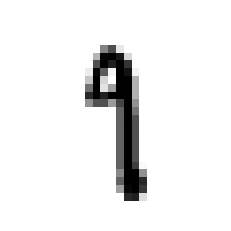

[2409] (예측값)9 (실제값)3


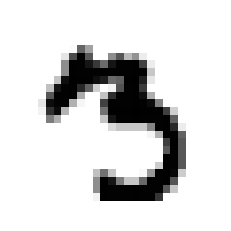

[2427] (예측값)4 (실제값)9


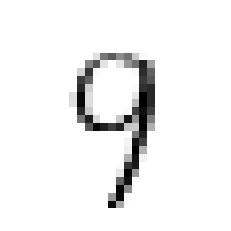

[2489] (예측값)4 (실제값)2


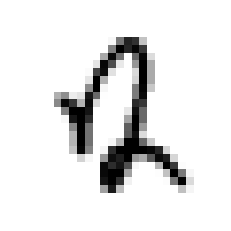

[2598] (예측값)3 (실제값)5


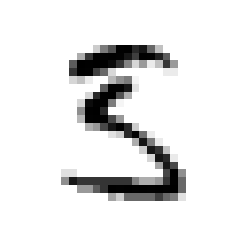

[2608] (예측값)1 (실제값)7


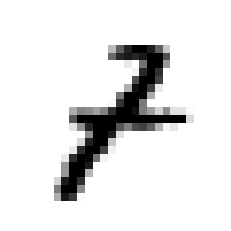

[2655] (예측값)1 (실제값)6


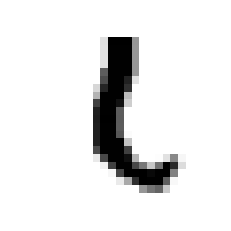

[2731] (예측값)4 (실제값)7


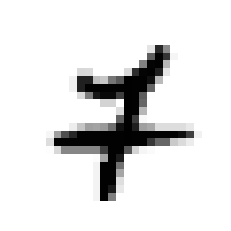

[2744] (예측값)8 (실제값)5


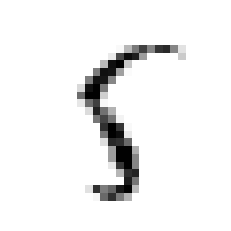

[2811] (예측값)3 (실제값)5


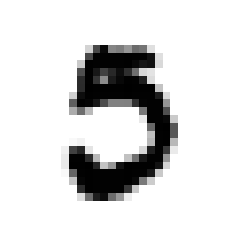

[2864] (예측값)4 (실제값)9


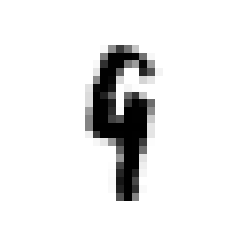

[2897] (예측값)6 (실제값)8


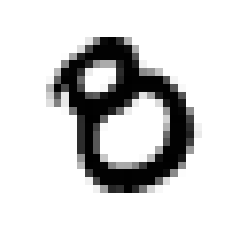

[2922] (예측값)2 (실제값)3


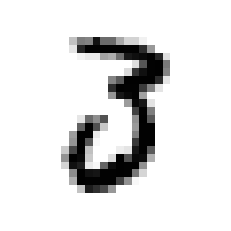

[2928] (예측값)2 (실제값)3


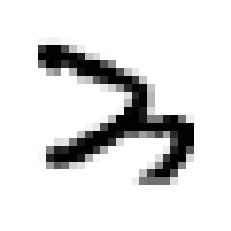

[2940] (예측값)7 (실제값)9


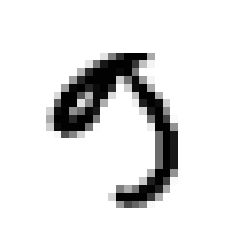

[2954] (예측값)5 (실제값)3


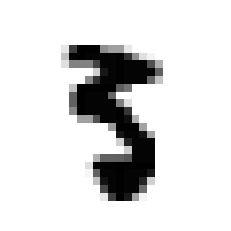

[2996] (예측값)8 (실제값)6


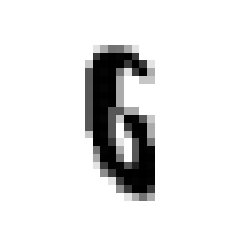

[3061] (예측값)1 (실제값)9


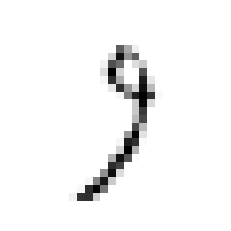

[3063] (예측값)5 (실제값)8


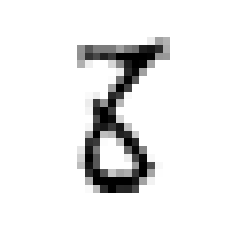

[3074] (예측값)2 (실제값)1


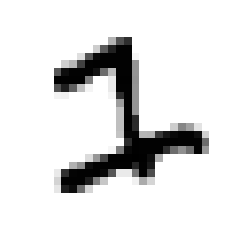

[3118] (예측값)9 (실제값)5


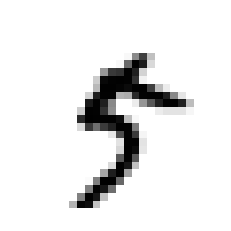

[3174] (예측값)2 (실제값)6


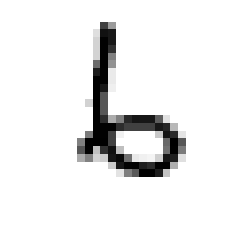

[3207] (예측값)3 (실제값)8


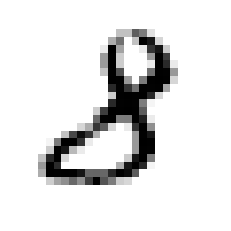

[3226] (예측값)9 (실제값)7


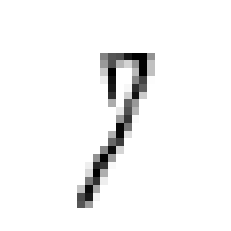

[3290] (예측값)9 (실제값)8


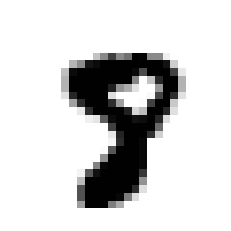

[3331] (예측값)8 (실제값)2


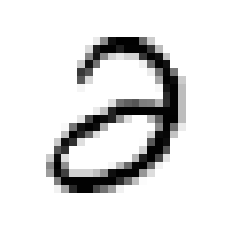

[3337] (예측값)9 (실제값)5


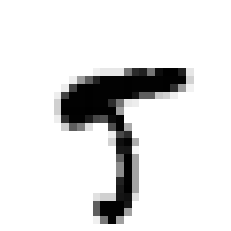

[3406] (예측값)9 (실제값)4


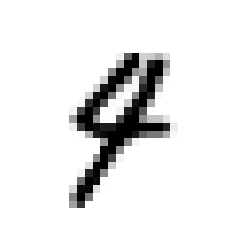

[3423] (예측값)0 (실제값)6


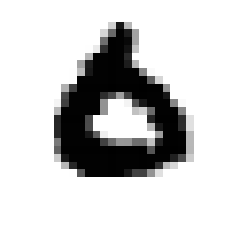

[3504] (예측값)1 (실제값)9


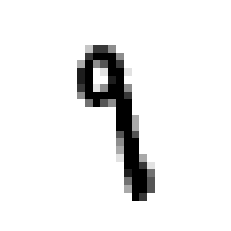

[3521] (예측값)4 (실제값)6


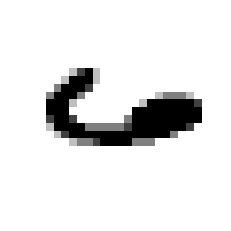

[3559] (예측값)0 (실제값)5


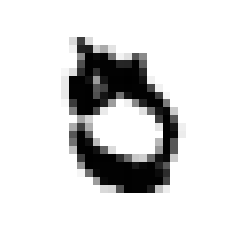

[3568] (예측값)5 (실제값)8


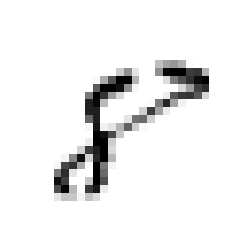

[3576] (예측값)6 (실제값)7


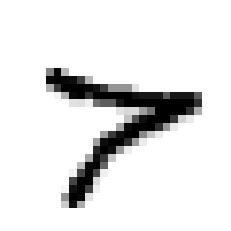

[3598] (예측값)3 (실제값)9


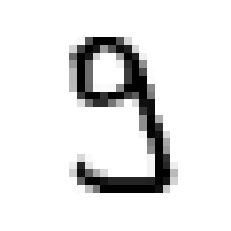

[3619] (예측값)7 (실제값)9


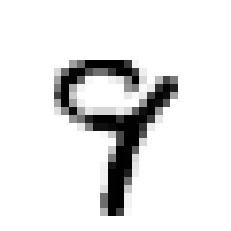

[3682] (예측값)8 (실제값)2


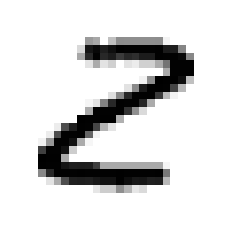

[3703] (예측값)4 (실제값)5


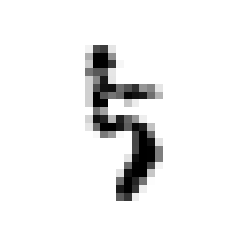

[3719] (예측값)9 (실제값)4


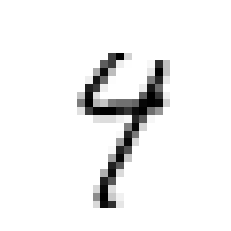

[3752] (예측값)2 (실제값)7


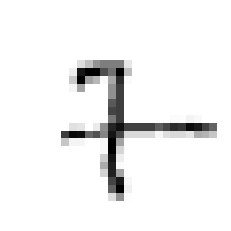

[3797] (예측값)8 (실제값)2


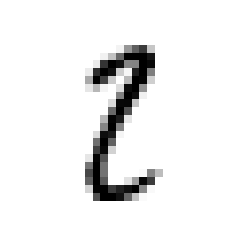

[3809] (예측값)8 (실제값)7


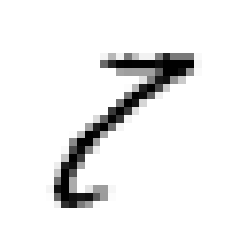

[3812] (예측값)9 (실제값)2


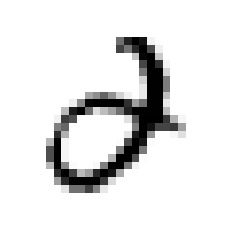

[3819] (예측값)4 (실제값)0


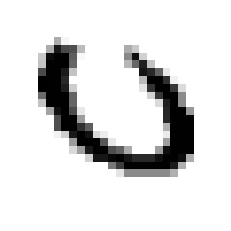

[3903] (예측값)3 (실제값)5


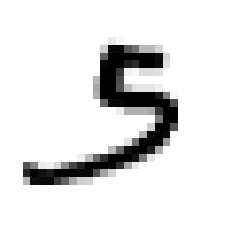

[3907] (예측값)3 (실제값)1


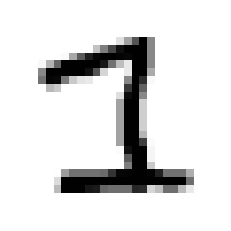

[3942] (예측값)2 (실제값)4


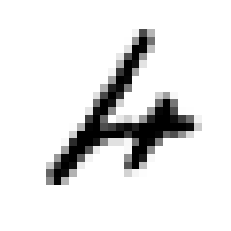

[3944] (예측값)5 (실제값)3


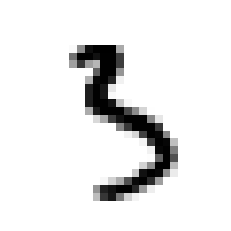

[3986] (예측값)4 (실제값)9


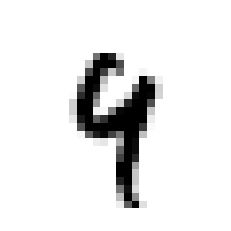

[4001] (예측값)8 (실제값)9


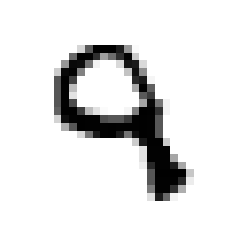

[4028] (예측값)1 (실제값)7


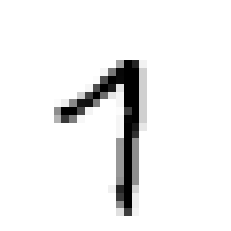

[4066] (예측값)2 (실제값)0


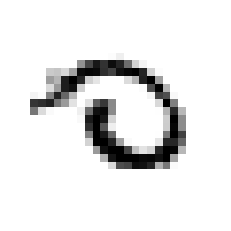

[4076] (예측값)3 (실제값)8


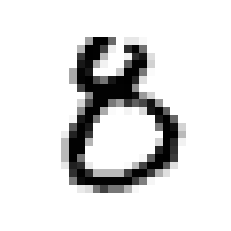

[4079] (예측값)3 (실제값)9


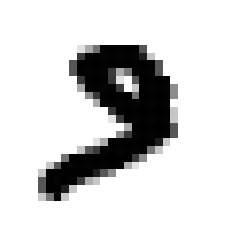

[4094] (예측값)4 (실제값)9


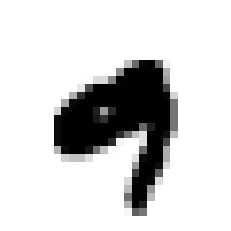

[4160] (예측값)3 (실제값)8


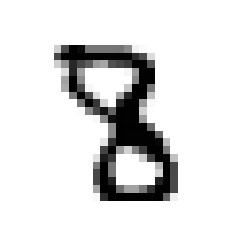

[4200] (예측값)9 (실제값)7


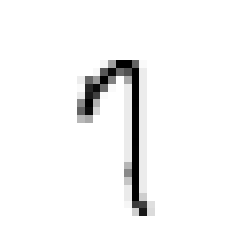

[4202] (예측값)7 (실제값)1


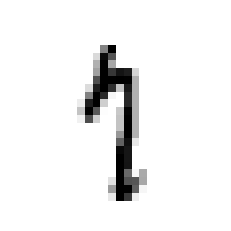

[4249] (예측값)4 (실제값)2


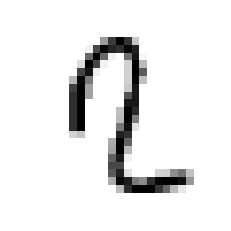

[4272] (예측값)3 (실제값)5


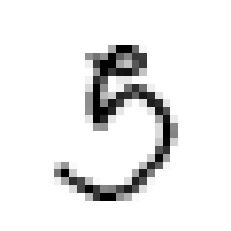

[4290] (예측값)7 (실제값)2


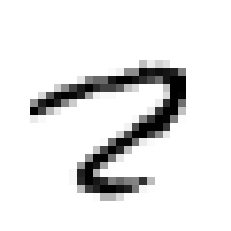

[4295] (예측값)7 (실제값)9


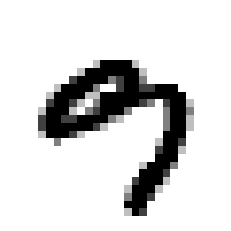

[4406] (예측값)4 (실제값)9


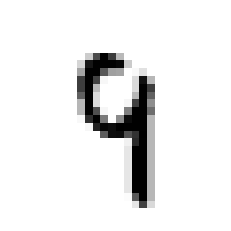

[4426] (예측값)4 (실제값)9


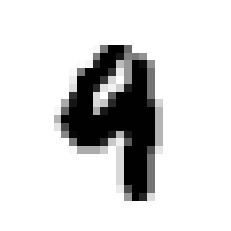

[4434] (예측값)2 (실제값)7


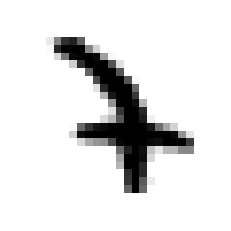

[4438] (예측값)2 (실제값)3


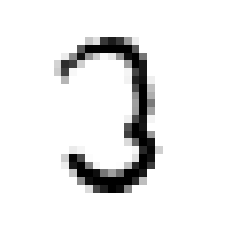

[4444] (예측값)2 (실제값)3


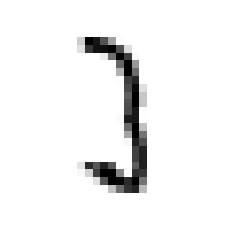

[4478] (예측값)6 (실제값)0


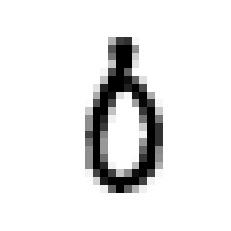

[4552] (예측값)4 (실제값)7


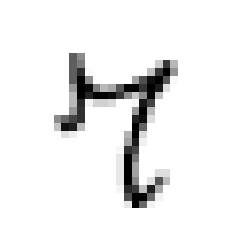

[4568] (예측값)9 (실제값)4


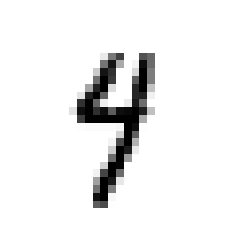

[4732] (예측값)7 (실제값)8


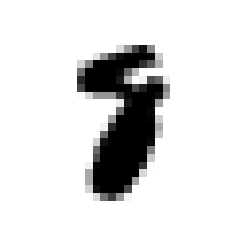

[4741] (예측값)5 (실제값)3


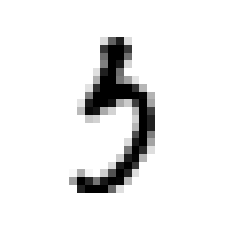

[4752] (예측값)6 (실제값)4


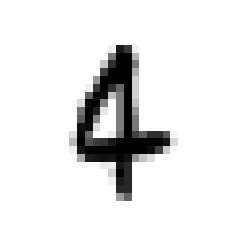

[4808] (예측값)3 (실제값)8


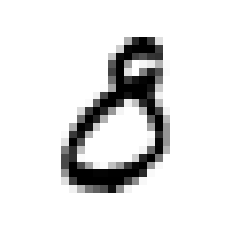

[4824] (예측값)4 (실제값)9


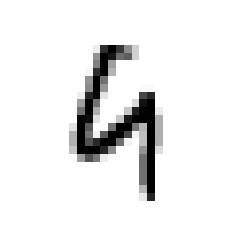

[4861] (예측값)9 (실제값)4


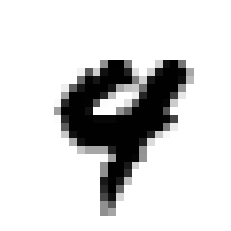

[4881] (예측값)8 (실제값)0


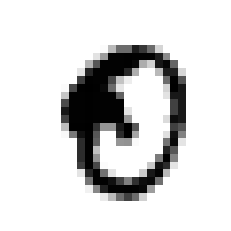

[4891] (예측값)3 (실제값)8


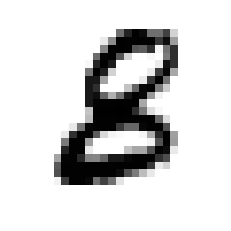

[4944] (예측값)8 (실제값)2


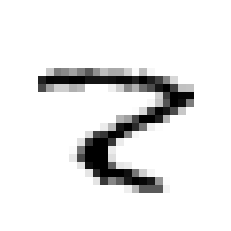

[5106] (예측값)4 (실제값)2


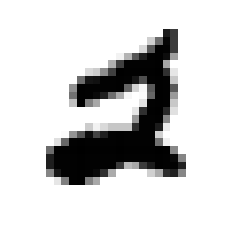

[5332] (예측값)6 (실제값)1


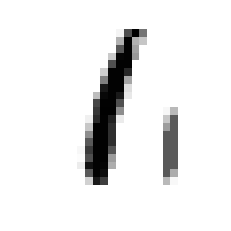

[5458] (예측값)8 (실제값)1


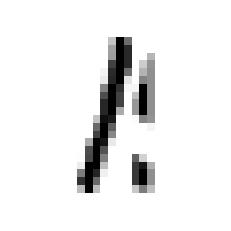

[5635] (예측값)3 (실제값)2


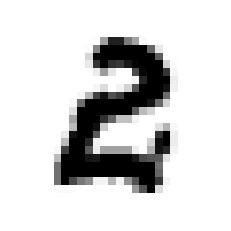

[5643] (예측값)8 (실제값)1


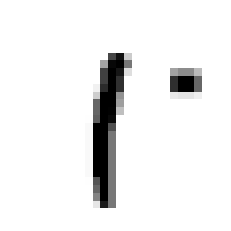

[5677] (예측값)2 (실제값)4


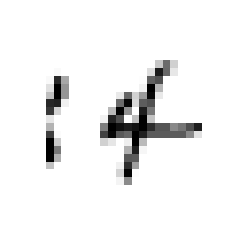

[5735] (예측값)7 (실제값)3


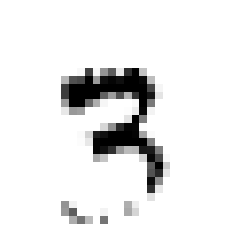

[5750] (예측값)2 (실제값)8


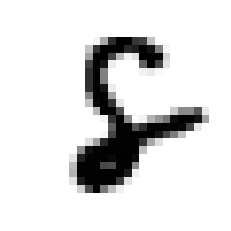

[5785] (예측값)7 (실제값)9


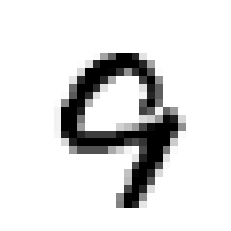

[5801] (예측값)7 (실제값)9


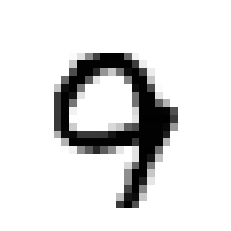

[5834] (예측값)9 (실제값)5


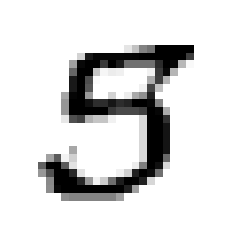

[5937] (예측값)9 (실제값)4


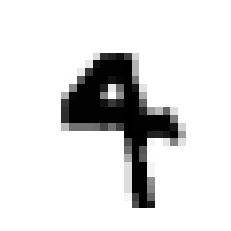

[5938] (예측값)3 (실제값)5


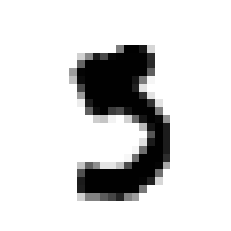

[5973] (예측값)3 (실제값)5


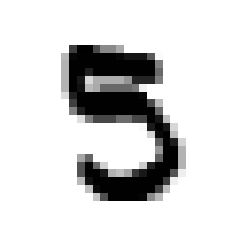

[5974] (예측값)9 (실제값)3


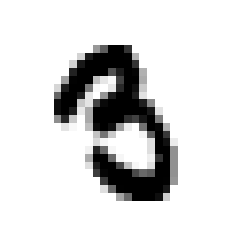

[5983] (예측값)3 (실제값)5


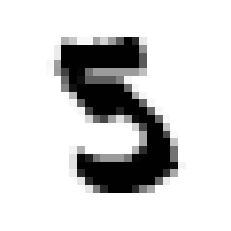

[5998] (예측값)9 (실제값)5


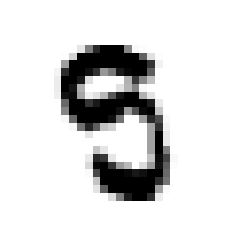

[6024] (예측값)9 (실제값)3


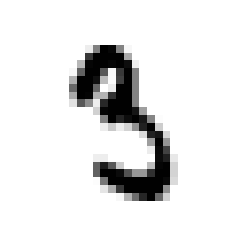

[6060] (예측값)0 (실제값)3


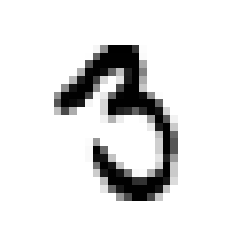

[6533] (예측값)5 (실제값)0


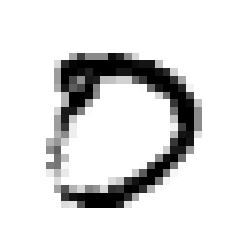

[6556] (예측값)9 (실제값)8


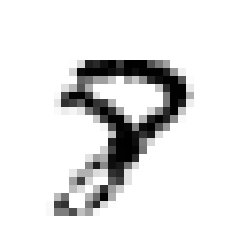

[6560] (예측값)7 (실제값)4


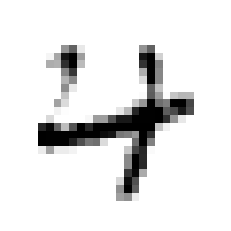

[6572] (예측값)7 (실제값)9


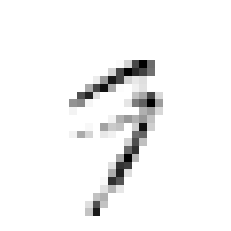

[6577] (예측값)1 (실제값)7


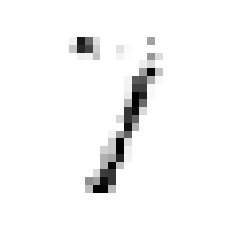

[6598] (예측값)7 (실제값)0


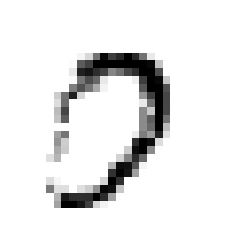

[6626] (예측값)7 (실제값)8


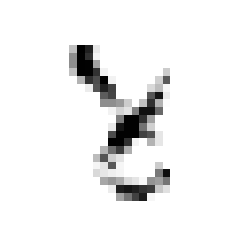

[6652] (예측값)8 (실제값)0


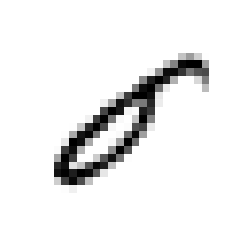

[6756] (예측값)7 (실제값)8


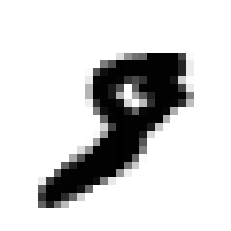

[6784] (예측값)6 (실제값)1


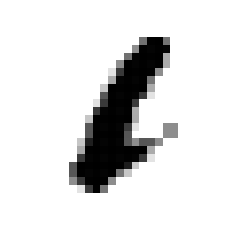

[6848] (예측값)4 (실제값)6


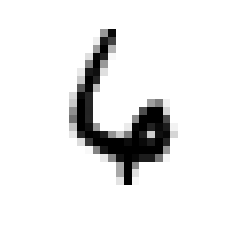

[7155] (예측값)7 (실제값)2


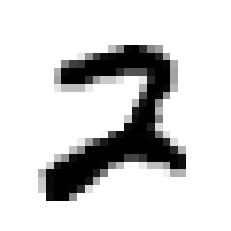

[7183] (예측값)7 (실제값)9


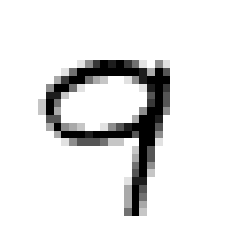

[7187] (예측값)9 (실제값)4


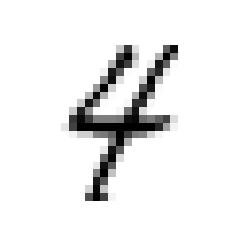

[7217] (예측값)6 (실제값)0


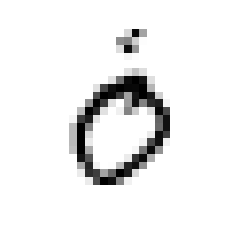

[7435] (예측값)8 (실제값)4


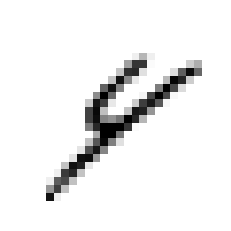

[7822] (예측값)2 (실제값)3


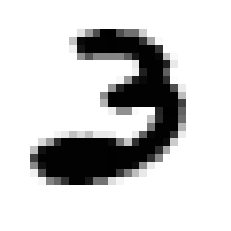

[7887] (예측값)4 (실제값)2


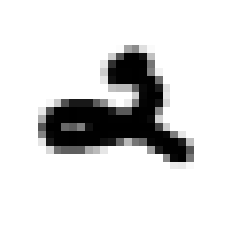

[7929] (예측값)8 (실제값)1


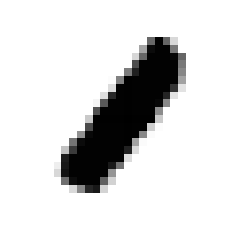

[8021] (예측값)8 (실제값)1


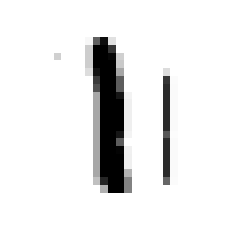

[8095] (예측값)8 (실제값)2


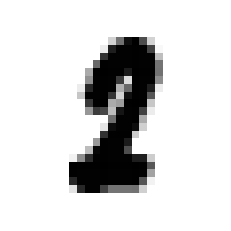

[8184] (예측값)5 (실제값)8


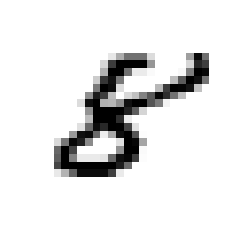

[8247] (예측값)9 (실제값)3


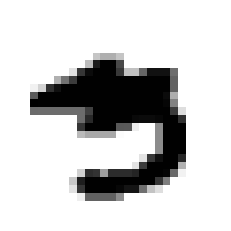

[8312] (예측값)4 (실제값)6


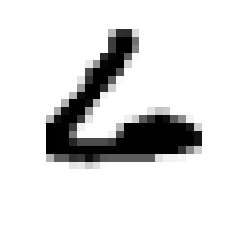

[8326] (예측값)6 (실제값)0


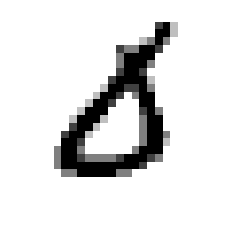

[8354] (예측값)4 (실제값)2


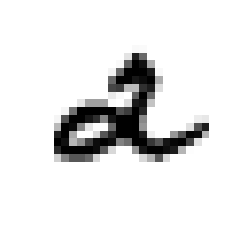

[8503] (예측값)3 (실제값)5


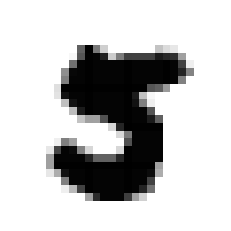

[8523] (예측값)6 (실제값)8


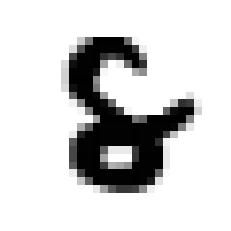

[8528] (예측값)9 (실제값)4


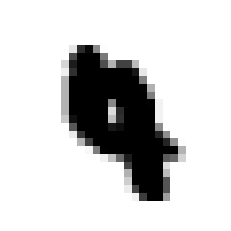

[9010] (예측값)2 (실제값)7


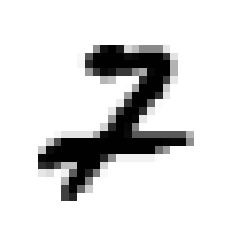

[9016] (예측값)2 (실제값)7


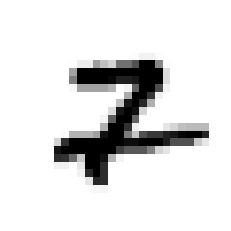

[9020] (예측값)2 (실제값)7


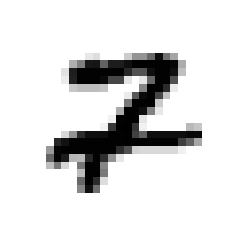

[9025] (예측값)2 (실제값)7


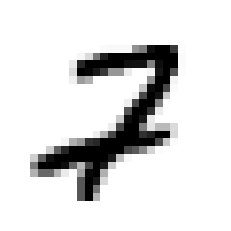

[9164] (예측값)2 (실제값)3


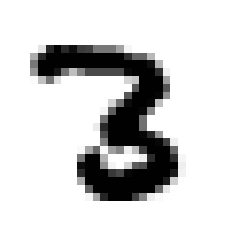

[9212] (예측값)9 (실제값)4


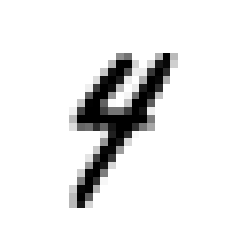

[9281] (예측값)5 (실제값)8


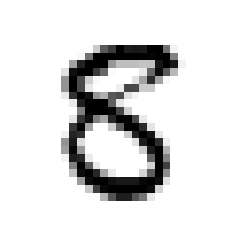

[9423] (예측값)3 (실제값)5


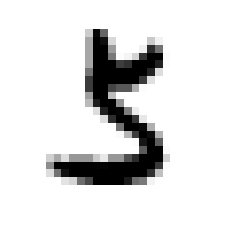

[9539] (예측값)9 (실제값)4


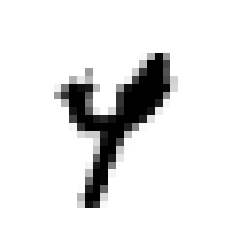

[9588] (예측값)4 (실제값)9


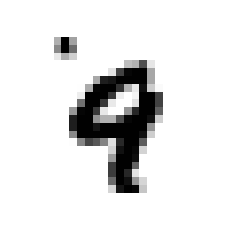

[9635] (예측값)3 (실제값)0


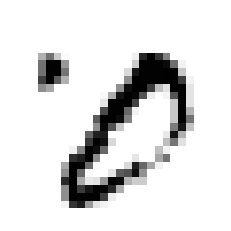

[9665] (예측값)7 (실제값)2


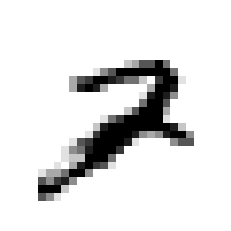

[9670] (예측값)7 (실제값)4


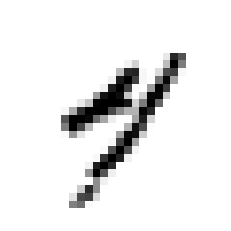

[9680] (예측값)3 (실제값)6


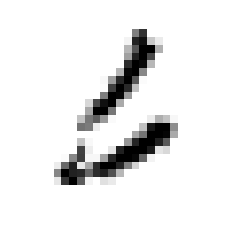

[9730] (예측값)6 (실제값)5


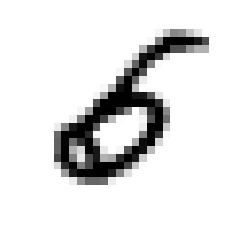

[9746] (예측값)2 (실제값)4


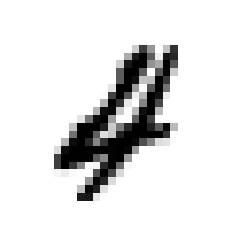

[9750] (예측값)6 (실제값)5


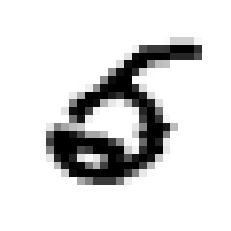

[9769] (예측값)0 (실제값)2


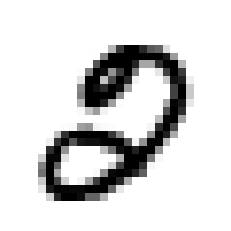

[9780] (예측값)0 (실제값)2


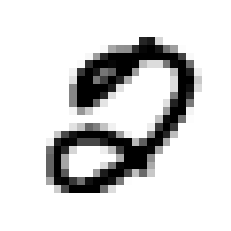

[9793] (예측값)9 (실제값)4


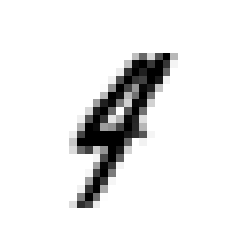

[9794] (예측값)5 (실제값)6


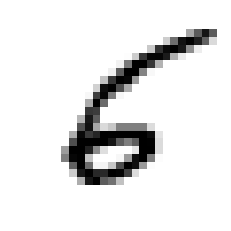

[9840] (예측값)7 (실제값)2


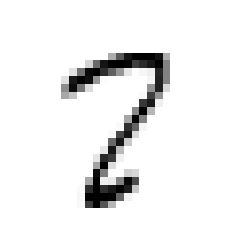

[9905] (예측값)6 (실제값)2


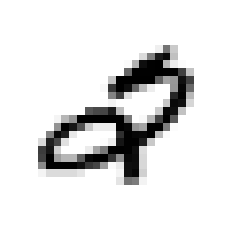

[9941] (예측값)4 (실제값)6


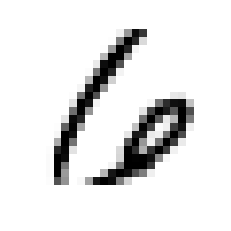

[9983] (예측값)3 (실제값)5


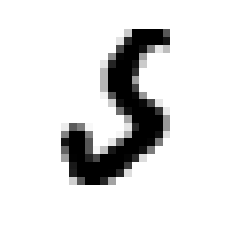

In [41]:
# None 을 적정한 코드로 교체하세요
# Step04. 테스트용 데이터를 대입했을 때, 맞추지 못한 항목에 대해 상세 보고한다.
# (1) 맞추지 못한 갯수
# (2) 맞추지 못한 항목 : 인덱스, 예측한 숫자값, 실제 숫자값
report_model_miss(model,test_images, test_labels)